## Global Chart Breakdown by Genre

In [2]:
from nltk import FreqDist #Importing natural language toolkit (nltk) to create word frequency distribution
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt

client_id = "61fc722b270143c39a95b0d83113b103"
client_secret = "a1b6d905ef364a4b9bd662f136c0892f"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

globalChart = pd.read_csv('regional-global-daily-latest.csv',header=1)
globalChart.head()


,Position,Track Name,Artist,Streams,URL
0,1,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,4310896,https://open.spotify.com/track/4w8niZpiMy6qz1m...
1,2,Happier,Marshmello,3943796,https://open.spotify.com/track/2dpaYNEQHiRxtZb...
2,3,I Love It (& Lil Pump),Kanye West,3467546,https://open.spotify.com/track/4S8d14HvHb70Imc...
3,4,Falling Down,Lil Peep,3096079,https://open.spotify.com/track/0Dn40gxVCMo5Tkg...
4,5,Promises (with Sam Smith),Calvin Harris,2929002,https://open.spotify.com/track/5N5k9nd479b1xpD...


In [3]:
songs = []
genres = []



for song in range(0,len(globalChart['Position'])):
    
    #I put this in a try just in case the search result yields an error..or any api request yields an error
    try:
        # I search the song name and artist using spotipy, then I limit the number of search results to 1
         track = sp.search(globalChart['Track Name'][song] + ' ' + globalChart['Artist'][song],limit=1)
            
            # Here I am parsing the json return to get the artists' id so I can look up the artist
         track_id = track['tracks']['items'][0]['artists'][0]['id']
        # This gets the artists' spotify profile, which includes the genres reflected in their music
         artist = sp.artist(track_id)
         genres.append(artist['genres'])
    except:
        genres.append('n/a')

retrying ...1secs
retrying ...1secs
retrying ...1secs


In [4]:
globalChart['genres'] = genres

In [5]:
globalChart.head()

,Position,Track Name,Artist,Streams,URL,genres
0,1,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,4310896,https://open.spotify.com/track/4w8niZpiMy6qz1m...,"[dance pop, edm, electronic trap, pop, tropica..."
1,2,Happier,Marshmello,3943796,https://open.spotify.com/track/2dpaYNEQHiRxtZb...,"[brostep, pop, progressive electro house]"
2,3,I Love It (& Lil Pump),Kanye West,3467546,https://open.spotify.com/track/4S8d14HvHb70Imc...,"[pop rap, rap]"
3,4,Falling Down,Lil Peep,3096079,https://open.spotify.com/track/0Dn40gxVCMo5Tkg...,"[emo rap, lgbtq+ hip hop]"
4,5,Promises (with Sam Smith),Calvin Harris,2929002,https://open.spotify.com/track/5N5k9nd479b1xpD...,"[dance pop, edm, electro house, house, pop, pr..."


In [6]:
allGenres = []
for gen in globalChart['genres']:
    if gen != 'n/a':
        for b in gen:
            allGenres.append(b)
len(allGenres)

651

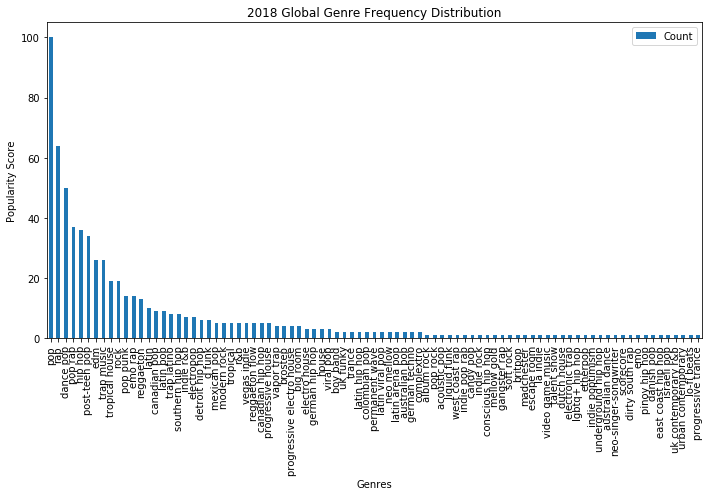

In [7]:
#I use FreqDist to automatically count the number of times a certain word, in this case genre, appears in the list
genreDist = FreqDist(allGenres)

df = pd.DataFrame.from_dict(genreDist, orient='index')

genre_count = df.rename_axis('Genre').reset_index().rename(columns={0:'Count'})

genre_count = genre_count.sort_values(by="Count", ascending=False)
genre_count = genre_count.set_index('Genre')
genre_count.plot(kind='bar', figsize=(10,7))
genre_count = genre_count.reset_index()
plt.title('2018 Global Genre Frequency Distribution')
plt.xlabel('Genres')
plt.ylabel('Popularity Score')
plt.tight_layout()
plt.savefig("freqDistGlobal.png")

In [8]:
genreDist

FreqDist({'pop': 100, 'rap': 64, 'dance pop': 50, 'pop rap': 37, 'hip hop': 36, 'post-teen pop': 34, 'edm': 26, 'trap music': 26, 'tropical house': 19, 'rock': 19, ...})

<Figure size 720x504 with 0 Axes>

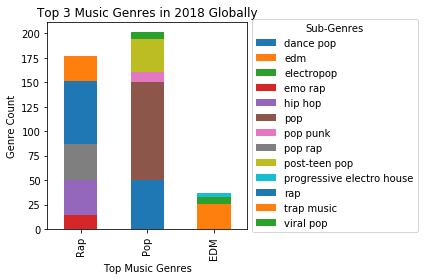

In [9]:
data = pd.DataFrame([
        ('Pop','pop', genreDist['pop']),
        ('Pop','dance pop', genreDist['dance pop']),
        ('Pop','post-teen pop', genreDist['post-teen pop']),
        ('Pop','pop punk', 10),
        ('Pop','viral pop', 7),
        ('Rap','rap', genreDist['rap']),
        ('Rap','pop rap', genreDist['pop rap']),
        ('Rap','hip hop', genreDist['hip hop']),
        ('Rap','trap music', genreDist['trap music']),
        ('Rap','emo rap', genreDist['emo rap']),
        ('EDM','electropop', genreDist['electropop']),
        ('EDM','edm', genreDist['edm']),
        ('EDM','progressive electro house', genreDist['progressive electro house']),
    ], 
    columns=['Top Music Genres', 'Sub-Genres', 'value']
)
data = data.set_index(['Top Music Genres', 'Sub-Genres']).value
plt.figure(figsize=(10,7))
data.unstack().sort_index(ascending=False).plot(kind='bar', stacked=True)
plt.title("Top 3 Music Genres in 2018 Globally")
plt.legend(title="Sub-Genres",loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Genre Count")
# data.sort_index(ascending=False)
plt.tight_layout()
plt.savefig("globalChart2018.png")